# Proyecto Final. Sprint 14 CallMeMaybe

Link PDF: https://drive.google.com/file/d/14FAu0f36KRhKZEMmdXa5HKO9noLRLNgT/view?usp=drive_link

## Objetivo del Estudio

Identificar operadores ineficaces con lo cual se podrá establecer metricas y metas a los operadores y así mejorar la calidad del servicio ofrecido.

### Detalles del objetivo

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

### Hipótesis

Jerarquizar la eficacia de los operadores con los que trabaja la empresa CallMeMaybe a través del estudio del historial registrado en los data sets con los que contamos

##  Prepocesamiento de Datos

In [1]:
# Carga de datasets

import pandas as pd

telecom_df = pd.read_csv('/datasets/telecom_dataset_us.csv', sep=',')
clients_df = pd.read_csv('/datasets/telecom_clients_us.csv', sep=',')

In [2]:
# Verificación de datos en df telecom_df

telecom_df.info()
print()
print(telecom_df.head())
print()
telecom_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out    

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Después de revisar los datos vemos que:
* Los datos de la columna date, operator id, se deben cambiar al formato correcto.
* Los datos ausentes de la columna internal se consideraran con un promedio al ser pocos comparados con el total.
* Los datos ausentes de la columna operator se colocarán con el nombre "No info" para tener ubicados los que entren en esta categoría.

In [3]:
# Verificación de datos en df telecom_clients

clients_df.info()
print()
print(clients_df.head())
print()
clients_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16



user_id        0
tariff_plan    0
date_start     0
dtype: int64

Despúes de analizar los datos del df clientes vemos que:

* Debemos cambiar los tipos de datos de la columna user_id a objet 
* Debemos cambiar los datos de la columna date_start a fecha.
* En este df no tenemos valores ausentes.

In [4]:
# En el df_users cambiar el tipo de dato de la columna user_id a object
clients_df['user_id'] = clients_df['user_id'].astype(object)
# En el df_users debemos cambiar los datos de la columna date_start a fecha
clients_df['date_start'] = pd.to_datetime(clients_df['date_start'])

In [5]:
# En el df_telecom cambiar el tipo de dato de la columna date a fecha localizada
telecom_df['date'] = pd.to_datetime(telecom_df['date']).dt.tz_localize(None)
# En el df_telecom cambiar el tipo de dato de la columna user_id a object
telecom_df['user_id'] = telecom_df['user_id'].astype(object)
# En el df_telecom cambiar el tipo de dato de la columna operator_id a object
telecom_df['operator_id'] = telecom_df['operator_id'].astype(object)
# En el df_telecom cambiar el tipo de dato de la columna internal a bool
telecom_df['internal'] = telecom_df['internal'].astype(bool)
# En el df_telecom eliminar las filas que en internal no tengan valor
telecom_df = telecom_df.dropna(subset=['internal'])

In [6]:
print(clients_df.info())
print()
print(clients_df.isnull().sum())
print()
print(telecom_df.info())
print()
print(telecom_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    object        
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 17.3+ KB
None

user_id        0
tariff_plan    0
date_start     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  object        
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53902 non-null  bool          
 4   operator_id          45730 non-null  object        
 5   is_misse

In [7]:
# Inspeccionar los valores ausentes de 'operator_id'

telecom_df[telecom_df['operator_id'].isna()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
7,166377,2019-08-05,in,False,NaN,True,6,0,35
9,166377,2019-08-06,in,False,NaN,True,4,0,62
17,166377,2019-08-07,in,False,NaN,True,2,0,24
27,166377,2019-08-12,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27,in,False,NaN,True,2,0,39
53880,168601,2019-11-28,in,False,NaN,True,1,0,19
53889,168603,2019-11-28,in,False,NaN,True,1,0,30
53893,168606,2019-11-08,in,False,NaN,True,6,0,121


Tenemos más de 8000 registros que no tienen valor en 'operator_id' y seguramente **se debe a que ningun operador pudo atender a tales clientes ya que no registra duración de atención pero sí de espera.** Sin embargo, verificaremos cuántas de esas llamadas **registran más de '0' en 'call_duration'** que son casos absurdos ya que **una llamada no atendida no debería tender call_duration.**

In [8]:
# Encontrar llamadas no atendidas pero que registran 'call_duration'

absurd_cases = telecom_df[(telecom_df['operator_id'].isna()) & (telecom_df['call_duration']>0)]
print(absurd_cases)

      user_id       date direction  internal operator_id  is_missed_call  \
698    166399 2019-08-12        in     False         NaN           False   
704    166399 2019-09-02        in     False         NaN           False   
4089   166503 2019-09-26       out     False         NaN           False   
4136   166503 2019-10-09        in     False         NaN           False   
4198   166503 2019-10-21       out      True         NaN           False   
...       ...        ...       ...       ...         ...             ...   
50930  168252 2019-11-28        in      True         NaN           False   
50946  168252 2019-11-28        in     False         NaN           False   
50955  168252 2019-11-28       out     False         NaN           False   
50956  168252 2019-11-28       out      True         NaN           False   
51680  168336 2019-11-14        in     False         NaN           False   

       calls_count  call_duration  total_call_duration  
698              1            

Son 122 llamadas no atendidas por ningún operador pero que registran un 'call_duration' mayor a '0'. Esto es una inconsistencia ya que **no puede haber atención sin operador que conteste**, y siendo una proporción de 122/53785 = 0.00226 (0.23%) se procede a eliminarlos del dataframe.

In [9]:
# Eliminar llamadas no atendidas pero que registran 'call_duration'

telecom_df.drop(absurd_cases.index, inplace=True) # Eliminar llamadas no atendidas pero que registran 'call_duration'
telecom_df.info() # verficiar eliminación

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53780 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53780 non-null  object        
 1   date                 53780 non-null  datetime64[ns]
 2   direction            53780 non-null  object        
 3   internal             53780 non-null  bool          
 4   operator_id          45730 non-null  object        
 5   is_missed_call       53780 non-null  bool          
 6   calls_count          53780 non-null  int64         
 7   call_duration        53780 non-null  int64         
 8   total_call_duration  53780 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.4+ MB


In [10]:
# Ahora verificaremos cuántas de las llamadas no atendidas fueron registradas como perdidas.
# Contar llamadas no atendidas registradas como perdidas.

telecom_df[(telecom_df['operator_id'].isna())]['is_missed_call'].value_counts()

True    8050
Name: is_missed_call, dtype: int64

Todas las llamadas en efecto fueron registradas como perdidas. Los valores NaN entonces indican que en efecto no hubo operador que atendiera o realizara dichas llamadas

Analizar las llamadas que no fueron contestadas, no se consideran las que duraron 0 ya que lo más probable es que se deban a factor externo como falla técnica o clientes que cuelgan de inmediato.

telecom_df.reset_index
absurd_cases.reset_index
print(telecom_df.head(5))
print()
print(absurd_cases.head(5))

In [11]:
# Revisar llamadas no contestadas "is_missed_call==True" & "call_duration>0"

absurd_cases = telecom_df[(telecom_df['is_missed_call']==True) & (telecom_df['call_duration']>0)]
absurd_cases['direction'].value_counts()

in     301
out     24
Name: direction, dtype: int64

* 301 llamadas realizadas por clientes que ningún operador contestó pero que registran tiempo de atención.
* 24 llamadas realizadas por operadores que ningún cliente contestó pero que registran tiempor de atención.

Al ser casos que parece ser son errores en los regitros podemos proceder a eliminarlos.

In [12]:
# También eliminamos estos registros de llamadas son absurdos.

telecom_df.drop(absurd_cases.index, inplace=True) # Eliminar casos absurdos
telecom_df.info() # verificar eliminación

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53455 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53455 non-null  object        
 1   date                 53455 non-null  datetime64[ns]
 2   direction            53455 non-null  object        
 3   internal             53455 non-null  bool          
 4   operator_id          45405 non-null  object        
 5   is_missed_call       53455 non-null  bool          
 6   calls_count          53455 non-null  int64         
 7   call_duration        53455 non-null  int64         
 8   total_call_duration  53455 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.4+ MB


Revisamos si hay casos de llamadas salientes que ningún operador realizó

direction=='out', operator_id=NaN (Si ningún operador llama a nadie no puede haber llamada saliente)

In [13]:
absurd_cases = telecom_df[(telecom_df['operator_id'].isna()) & (telecom_df['direction']=='out')]
len(absurd_cases)

151

Tenemos 151 llamadas absurdos representa el 0.28% de los registros totales. Se puede eliminar del dataset.

In [14]:
# Eliminamos absurd_cases_out del telecom_df

telecom_df.drop(absurd_cases.index, inplace=True)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53304 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53304 non-null  object        
 1   date                 53304 non-null  datetime64[ns]
 2   direction            53304 non-null  object        
 3   internal             53304 non-null  bool          
 4   operator_id          45405 non-null  object        
 5   is_missed_call       53304 non-null  bool          
 6   calls_count          53304 non-null  int64         
 7   call_duration        53304 non-null  int64         
 8   total_call_duration  53304 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.4+ MB


In [15]:
# Ahora cuantificamos los casos de llamadas entrantes

telecom_df[telecom_df['operator_id'].isna()][['direction', 'is_missed_call', 'internal']].value_counts()

direction  is_missed_call  internal
in         True            False       7536
                           True         363
dtype: int64

Tenemos **363 llamadas entrantes** (realizadas por clientes al contact center) que se perdieron, **pero al mismo tiempo fueron internas** (realizadas entre operadores). No tiene sentido, por lo que debe tratarse un error en el registro y por lo tanto las podemos eliminar.

In [16]:
# Definimos como caso absurdo estas 363 registros

absurd_cases = telecom_df[(telecom_df['operator_id'].isna()) & (telecom_df['internal']==True)]

In [17]:
# Eliminar casos absurdos

telecom_df.drop(absurd_cases.index, inplace=True)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52941 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              52941 non-null  object        
 1   date                 52941 non-null  datetime64[ns]
 2   direction            52941 non-null  object        
 3   internal             52941 non-null  bool          
 4   operator_id          45405 non-null  object        
 5   is_missed_call       52941 non-null  bool          
 6   calls_count          52941 non-null  int64         
 7   call_duration        52941 non-null  int64         
 8   total_call_duration  52941 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 3.3+ MB


Solo nos quedan las **llamadas entrantes que se perdieron y no fueron realizadas entre los operadores.** Estos valores ausentes son representativos y no deben ser eliminados, por lo que se puede optar por reemplazarlos por algún valor distintivo como "0".

In [18]:
# Reemplazar valores ausentes por cero
telecom_df['operator_id'].fillna(0, inplace=True)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52941 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              52941 non-null  object        
 1   date                 52941 non-null  datetime64[ns]
 2   direction            52941 non-null  object        
 3   internal             52941 non-null  bool          
 4   operator_id          52941 non-null  float64       
 5   is_missed_call       52941 non-null  bool          
 6   calls_count          52941 non-null  int64         
 7   call_duration        52941 non-null  int64         
 8   total_call_duration  52941 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.3+ MB


Ahora ya no existen valores ausentes en el dataframe calls. Respecto a la cantidad inicial de 53902, al final se eliminó solo el 1.78% de datos, por lo que no se apreciará sesgo en los resultados procesados.

###  Estudiar valores duplicados

In [19]:
telecom_df[telecom_df.duplicated()].value_counts()

user_id  date        direction  internal  operator_id  is_missed_call  calls_count  call_duration  total_call_duration
166377   2019-08-05  out        False     880020.0     True            8            0              50                     1
167580   2019-11-08  out        True      937362.0     False           1            67             73                     1
                                False     937156.0     False           1            60             64                     1
         2019-11-07  out        False     936382.0     True            12           0              332                    1
         2019-11-06  out        False     937368.0     True            1            0              32                     1
                                                                                                                         ..
166973   2019-09-17  in         False     901586.0     False           3            202            230                    1
         2019

Tenemos 4821 registros duplicados pertenecientes a registros que fueron duplicados una sola vez.

Podría fácilmente eliminarse estos duplicados o bien tomar beneficio de la duda de que se realizaron llamadas con los mismos parámetros el mismo día pero a diferentes horas del día, aunque el campo de fecha no ofrece precisión horaria; por lo que una medida conservadora sería priorizar determinados registros de llamadas según las condiciones para medir ineficacia, de manera que **los duplicados a conservar serían aquellos donde las llamadas no se pierden,** es decir borrar duplicados donde is_missed_call=False **ya que al borrar duplicados de llamadas perdidas implicaría reducir la ineficacia de operadores,** pero el objetivo es detectar más claramente la ineficacia.

In [20]:
# cuantificar registros duplicados de llamadas no perdidas

duplicates = telecom_df[(telecom_df.duplicated()) & (telecom_df['is_missed_call']==False)]
len(duplicates)

2776

Resulta más conservador borrar 2776 registros duplicados que 4821.

In [21]:
# Eliminar los 2776 duplicados

telecom_df.drop(duplicates.index, inplace=True)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50165 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              50165 non-null  object        
 1   date                 50165 non-null  datetime64[ns]
 2   direction            50165 non-null  object        
 3   internal             50165 non-null  bool          
 4   operator_id          50165 non-null  float64       
 5   is_missed_call       50165 non-null  bool          
 6   calls_count          50165 non-null  int64         
 7   call_duration        50165 non-null  int64         
 8   total_call_duration  50165 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.2+ MB


Quedan 50165 registros, solo se ha eliminado un 6.9% de datos, una proporción conservadora para no sesgar significativamente el dataset original. De esta forma podremos obtener un resultado más exacto en detectar operadores ineficientes.

In [22]:
# Une los df por user_id

df_callmemaybe = pd.merge(clients_df, telecom_df, on='user_id')

In [23]:
print(df_callmemaybe.head())

  user_id tariff_plan date_start       date direction  internal  operator_id  \
0  166713           A 2019-08-15 2019-08-21        in     False          0.0   
1  166713           A 2019-08-15 2019-08-22        in     False     891918.0   
2  166713           A 2019-08-15 2019-08-22        in     False     891908.0   
3  166713           A 2019-08-15 2019-08-22        in     False          0.0   
4  166713           A 2019-08-15 2019-08-26        in     False     891908.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            4              0                    8  
1           False            1             40                   62  
2           False            4            538                  568  
3            True            4              0                    8  
4           False            1            713                  727  


In [24]:
# A cuántos clientes llaman los operadores.

df_callmemaybe.groupby('operator_id')['user_id'].nunique()

operator_id
0.0         303
879896.0      1
879898.0      1
880020.0      1
880022.0      1
           ... 
972410.0      1
972412.0      1
972460.0      1
973120.0      1
973286.0      1
Name: user_id, Length: 1093, dtype: int64

Podemos ver que prácticamente existe un operador para cada cliente.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Muy bien! Esta sección de preprocesamiento es de nivel avanzado. Has hecho un excelente trabajo al identificar inconsistencias lógicas (como llamadas con duración pero sin operador), clasificarlas como absurdas y eliminarlas con criterios razonables. También es destacable el enfoque cuidadoso al tratar valores duplicados, priorizando la conservación de registros perdidos para no subestimar la ineficiencia.  

💡 Muy buena decisión usar "0" como identificador para `operator_id` cuando no hay operador asignado: evita perder información relevante sin introducir sesgo. Además, la fusión final con `clients_df` está correctamente implementada.

🎯 En general, se nota una comprensión profunda del negocio y de la lógica del sistema, más allá de lo técnico. Esto le da mucha solidez al análisis posterior.

¡Sigue así, tu depuración de datos está muy bien fundamentada! 🧹📊✨

</div>

## Análisis exploratorio de datos.

In [25]:
#Analizamos la distribución de los tariff plans 

clients_df['tariff_plan'].value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

In [26]:
# Contar con la duración promedio de las llamadas.

df_callmemaybe['waiting_duration'] = df_callmemaybe['total_call_duration'] - df_callmemaybe['call_duration']
print(df_callmemaybe.head())

  user_id tariff_plan date_start       date direction  internal  operator_id  \
0  166713           A 2019-08-15 2019-08-21        in     False          0.0   
1  166713           A 2019-08-15 2019-08-22        in     False     891918.0   
2  166713           A 2019-08-15 2019-08-22        in     False     891908.0   
3  166713           A 2019-08-15 2019-08-22        in     False          0.0   
4  166713           A 2019-08-15 2019-08-26        in     False     891908.0   

   is_missed_call  calls_count  call_duration  total_call_duration  \
0            True            4              0                    8   
1           False            1             40                   62   
2           False            4            538                  568   
3            True            4              0                    8   
4           False            1            713                  727   

   waiting_duration  
0                 8  
1                22  
2                30  
3         

In [27]:
# Definir diccionario de agregación
aggregate = {'is_missed_call':'sum', 'waiting_duration':'mean', 'calls_count':'sum'}

# Agrupar y obtener estadísticas de eficacia previamente definidas
operators_performance = df_callmemaybe.groupby(['operator_id', 'direction', 'tariff_plan']).agg(aggregate)
operators_performance.columns = ['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out'] # renombrar columnas
operators_performance = operators_performance.reset_index(['direction', 'tariff_plan'])
print(operators_performance.head())

            direction tariff_plan  num_missed_calls_in  avg_waiting_time_in  \
operator_id                                                                   
0.0                in           A                 1203           364.862012   
0.0                in           B                 2867           163.650855   
0.0                in           C                 3466           125.039238   
879896.0           in           B                    0            27.333333   
879896.0          out           B                   50           118.363636   

             num_calls_out  
operator_id                 
0.0                  62687  
0.0                  26556  
0.0                  22052  
879896.0                58  
879896.0               876  


Definimos condiciones que definen ineficacia de operadores:

* Alto número de llamadas entrantes perdidas
* Largo tiempo de espera para atender llamadas entrantes
* Bajo número de llamadas salientes

In [28]:
# Número de llamadas entrantes perdidas y demoradas de atender
in_missed_delayed_calls = operators_performance[operators_performance['direction']=='in'].iloc[:,:-1]
in_missed_delayed_calls.drop('direction', axis=1, inplace=True)
out_num_calls = operators_performance[operators_performance['direction']=='out']['num_calls_out']

report = pd.merge(in_missed_delayed_calls, out_num_calls, on = 'operator_id', how='outer').reset_index()
print(report)

      operator_id tariff_plan  num_missed_calls_in  avg_waiting_time_in  \
0             0.0           A               1203.0           364.862012   
1             0.0           B               2867.0           163.650855   
2             0.0           C               3466.0           125.039238   
3        879896.0           B                  0.0            27.333333   
4        879898.0           B                  0.0            29.473684   
...           ...         ...                  ...                  ...   
1090     970484.0         NaN                  NaN                  NaN   
1091     970486.0         NaN                  NaN                  NaN   
1092     972408.0         NaN                  NaN                  NaN   
1093     972410.0         NaN                  NaN                  NaN   
1094     973120.0         NaN                  NaN                  NaN   

      num_calls_out  
0               NaN  
1               NaN  
2               NaN  
3          

* Los valores NaN en 'tariff_plan' indican que las llamadas no pertenecen a un plan específico. Podemos reemplazar con 'other' sería más representativo.
* Los valores NaN en 'num_missed_calls(in)' indican que el operador nunca le llegaron llamadas entrantes. En este caso no debemos cambiar el valor ya que afecta el cálculo injustamente.
* Los valores NaN en 'avg_waiting_time(in)' indican que el operador no demoró en atender llamadas entrantes que nunca llegaron. En este caso tampoco debemos cambiar el valor ya que afecta el cálculo injustamente.
* Los valores NaN en 'num_calls(out)' indican que el operador no realizó llamadas salientes. Podemos reemplazar con '0' en este caso

In [29]:
report['tariff_plan'] = report['tariff_plan'].fillna('other') # Reemplazar valores NaN
report['num_calls_out'] = report['num_calls_out'].fillna(0).round(0) # Reemplazar valores NaN

## Revisión de eficacia de los operadores

Podemos decur que el operador es eficaz si cumple con al menos una de las 3 condiciones:

* Perder pocas llamadas entrantes (num_missed_calls(in) < avg_a)
* Atender rápido (avg_waiting_time(in) < avg_b)
* Llamar a suficientes clientes (num_calls(out) > avg_c)

In [30]:
# Mostrar valores medios que representan umbrales de ineficacia
avg_a, avg_b, avg_c = report[['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out']].mean()
print(avg_a, avg_b, avg_c)

10.554232804232804 59.759575550905744 580.3497716894977


* En promedio se pierden 10.55 llamadas entrantes por operador
* En promedio los operadores se tarden 60 segundos en antender a los clientes
* En promedio los operadores realizan 580 llamadas a clientes.

In [31]:
# Crear columna effective para definir el cumplimiento de tareas del operador
report['effective'] = (
    (report['num_missed_calls_in'] < avg_a) |
    (report['avg_waiting_time_in'] < avg_b) |
    (report['num_calls_out'] > avg_c))
print(report)

      operator_id tariff_plan  num_missed_calls_in  avg_waiting_time_in  \
0             0.0           A               1203.0           364.862012   
1             0.0           B               2867.0           163.650855   
2             0.0           C               3466.0           125.039238   
3        879896.0           B                  0.0            27.333333   
4        879898.0           B                  0.0            29.473684   
...           ...         ...                  ...                  ...   
1090     970484.0       other                  NaN                  NaN   
1091     970486.0       other                  NaN                  NaN   
1092     972408.0       other                  NaN                  NaN   
1093     972410.0       other                  NaN                  NaN   
1094     973120.0       other                  NaN                  NaN   

      num_calls_out  effective  
0               0.0      False  
1               0.0      False  


Rendimiento de Operadores
Ahora para definir el rendimiento se procede a normalizar las métricas de ineficacia y se las pondera para obtener valores de 0 a 1. La ponderación de importancia se describe a continuación:

Deifinimos los siguientes pesos a las variables:

* A (num_missed_calls(in) > avg_a): 0.4
* B (avg_waiting_time(in) > avg_b): 0.4
* C (num_calls(out) < avg_c): 0.2

In [32]:
# Normalizar las columnas de 0-1
# https://qu4nt.github.io/sklearn-doc-es/modules/preprocessing.html#preprocessing-scaler

import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Normalizar las columnas de 0-1

w_a, w_b, w_c = [0.4, 0.4, 0.2] # definir pesos de pponderación

# Crear columna de performance que mide el rendimiento general del operador.
report['performance'] = (
    w_a * (1 - scaler.fit_transform(report[['num_missed_calls_in']])) +
     w_b * (1 - scaler.fit_transform(report[['avg_waiting_time_in']])) +
     w_c * scaler.fit_transform(report[['num_calls_out']])
).round(2)

report['avg_waiting_time_in'] = report['avg_waiting_time_in'].round(2)
report['num_calls_out'] = report['num_calls_out'].astype('int64')
report['operator_id'] = report['operator_id'].astype('int64')

report.sort_values('performance', ascending=False) # ordenar de forma descendente el performance

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,effective,performance
24,885876,A,15.0,102.50,62491,True,0.96
25,885890,A,16.0,126.45,61310,True,0.94
401,925922,A,4.0,120.96,20367,True,0.82
4,879898,B,0.0,29.47,7443,True,0.81
8,880028,B,0.0,8.37,2614,True,0.81
...,...,...,...,...,...,...,...
1090,970484,other,NaN,NaN,7,False,NaN
1091,970486,other,NaN,NaN,6,False,NaN
1092,972408,other,NaN,NaN,8,False,NaN
1093,972410,other,NaN,NaN,77,False,NaN


Realizamos una matriz de correlaciones para observar la eficacia y rendimiento de los operadores.

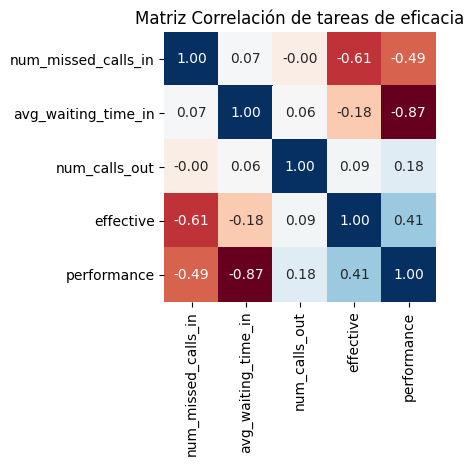

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = report.iloc[:,2:].corr() # correlacionar tareas con eficacia y rendimiento

plt.figure(figsize=(3.5,3.5)) # tamaño de figura
sns.heatmap(data=corr_matrix, annot=True, cmap='RdBu', fmt=".2f", cbar=None) # generar heatmap
plt.title('Matriz Correlación de tareas de eficacia')
plt.show()

La eficacia de los operadores es masomenos proporcional al rendimiento de trabajo, por lo que se podría generalizar que un operador puede ser eficaz si aumenta su rendimiento general.

**Eficacia:**

Un bajo número de llamadas perdidas favorece moderadamente la eficacia de los operadores (como vemos en la matriz es de -61).
Un bajo retraso en atender llamadas favorece poco la eficacia de los operadores
Un alto número de llamadas salientes favorece muy poco la eficacia de los operadores

**Rendimiento:**

Un bajo número de llamadas perdidas favorece moderadamente el rendimiento de los operadores.
Un bajo retraso en atender llamadas favorece mucho el rendimiento de los operadores.
Un alto número de llamadas salientes favorece poco la eficacia de los operadores


Los operadores para ser eficaces deben priorizar sus tareas en el siguiente orden:

* No perder llamadas.
* No hacer esperar mucho al cliente.
* Llamar a clientes.

Los operadores para aumentar su rendimiento deben priorizar sus tareas en el siguiente orden:

* No hacer esperar mucho al cliente.
* No perder llamadas.
* Llamar a clientes.

Procedemos a trazar histogramas de num_missed_calls, avg_waiting_time_in, num_calls_out para observar su distribución y patrón de eficacia según el umbral definido por su media.

In [34]:
# Se define una función para calcular estadísticas principales de media, mediana y Percentil 95
def main_stats(data):
    """
    Calcula y muestra las estadísticas principales de un conjunto de datos.

    Parámetros:
    data (iterable): El conjunto de datos sobre el cual calcular las estadísticas.

    Retorna:
    None
    """
    print('P95:', np.percentile(data,95)) # mostrar percentil 95
    print('P_mean:', stats.percentileofscore(data, data.mean()).round(2)) # mostrar percentil de media
    print(data.agg({'mean', 'median'}).round(2)) # Mostrar media y mediana

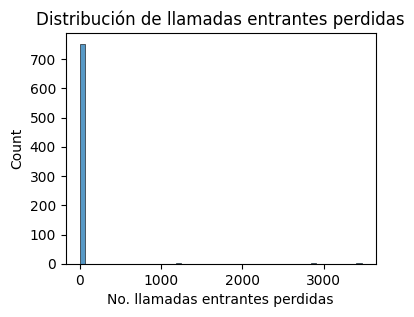

Estadísticas de llamada entrantes perdidas
P95: 3.0
P_mean: 98.81
median     0.00
mean      10.55
Name: num_missed_calls_in, dtype: float64
None


In [35]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

data = report['num_missed_calls_in'].dropna() # definir datos a usar

plt.figure(figsize=(4,3)) # Definir tamaño de figura
sns.histplot(data=data, bins=50) # trazar histograma
plt.title('Distribución de llamadas entrantes perdidas') # personalizar titulo
plt.xlabel('No. llamadas entrantes perdidas') # personalizar etiqueta eje x
plt.show() # mostrar plot

# mostrar estadísticas principales
print('Estadísticas de llamada entrantes perdidas')
print(main_stats(data))

Cerca de 750 operadores (95%) perdieron 3 llamadas entrantes. Pocos operadores perdieron más de 1000 llamadas. Se observa un cumplimiento de la mayoría de operadores en perder pocas llamadas entrantes. En este caso el 98.8% de operadores son eficaces al demorar menos en atender la media permitida de 10.55 llamadas entrantes.

En este caso la mediana es un umbral nominalmente exagerado, por lo que la media de 10.55 segundos es más razonable como umbral para periodos futuros.

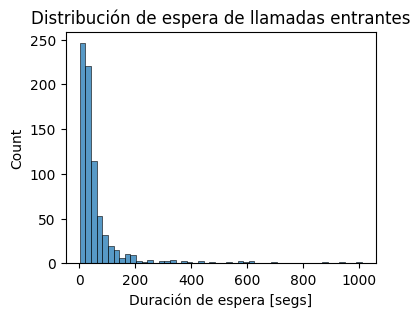

P95: 192.005
P_mean: 75.53
median    31.17
mean      59.76
Name: avg_waiting_time_in, dtype: float64


In [36]:
data = report['avg_waiting_time_in'].dropna() # definir datos a usar

plt.figure(figsize=(4,3)) # Definir tamaño de figura
sns.histplot(data=data, bins=50) # trazar histograma
plt.title('Distribución de espera de llamadas entrantes') # personalizar titulo
plt.xlabel('Duración de espera [segs]') # personalizar etiqueta eje x
plt.show() # mostrar plot

main_stats(data) # mostrar estadísticas principales

El 95% de los operadores se demora a lo mucho 192 segundos en atender llamadas entrantes y solo la mitad de los operadores consigue cumplir en constetar llamadas antes de 31.17 segundos que es menor a la media permitida de 59.8 segundos. En esta tarea no son eficaces el 24.47% de operadores.

Un umbral de 31.17 segundos es un valor de espera razonable para atender llamadas entrantes, mientras que 59.76 segundos puede ser demasiada espera para el cliente hasta ser atendido. Se puede definir la mediana o el valor de 30 segundos como nuevo umbral.

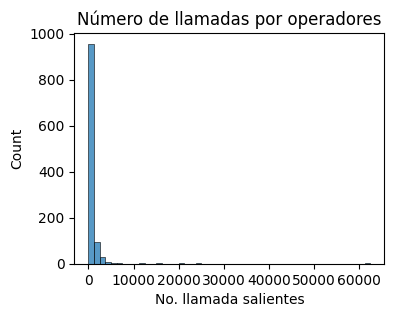

P95: 192.005
P_mean: 75.53
median    31.17
mean      59.76
Name: avg_waiting_time_in, dtype: float64


In [37]:
ata = report['num_calls_out'].dropna() # definir datos a usar

plt.figure(figsize=(4,3)) # Definir tamaño de figura
sns.histplot(data=report['num_calls_out'], bins=50) # trazar histograma
plt.title('Número de llamadas por operadores') # personalizar titulo
plt.xlabel('No. llamada salientes') # personalizar etiqueta eje x
plt.show() # mostrar plot

main_stats(data) # mostrar estadísticas principales

El 95% de los operadores realiza menos de 2298 llamadas salientes y solo la mitad de operadores realiza como mucho 34 llamadas, lo cual es bastante menor que la media esperada de 580 llamadas. Según este parámetro en esta tarea el 79.5% de operadores son ineficaces.

Los operadores deben siempre realizar llamadas, no es absurdo que puedan alcanzar una cantidad de 580 pero ello supone que solo tengan éxito el 21.47% de operadores. En este caso es más razonable elegir la mediana de 34 llamadas, pero para no ser muy permisivo un umbral fijado en 200 llamadas salientes podría ser más conveniente.

A medida que aumenten los operadores eficaces, se pueden definir nuevos umbrales razonables en proporción al rendimiento de los operadores. Esto a su vez permite definir el perfil de competencia de futuros empleados.

Se separa a los operadores por eficaces e ineficaces y se muestra un countplot.

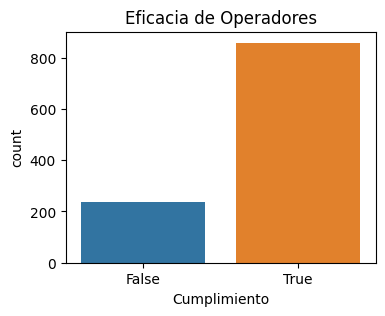

       count  proportion
True     859        0.78
False    236        0.22


In [38]:
# hacemos una gráfica para separar operadores eficaces e ineficaces con countplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.countplot(data=report, x='effective')
plt.title('Eficacia de Operadores')
plt.xlabel('Cumplimiento')
plt.show() # mostrar plot

# cuantificar operadores
data = report['effective']
rigor_effective = pd.concat([data.value_counts(), data.value_counts(normalize=True)], axis=1).round(2)
# cambiar el nombre de las columnas 'count' y 'proportion' de rigor_effective
rigor_effective.columns = ['count', 'proportion']
print(rigor_effective)

859 operadores fueron eficaces, es decir cumplieron con todas las tareas básicas según los umbrales definidos por la media de cada una. 236 operadores (22%) fueron ineficaces, por lo que necesitan un seguimiento específico según sus falencias, que se detalla a continuación

In [39]:
# calcular el número de operadores ineficaces desconocidos
report[(data==False) & (report['operator_id']==0)]['operator_id'].count()

3

3 son los operadores desconocidos que fueron ineficaces.

In [40]:
# Calcular el número de operadores ineficaces que no recibieron llamadas
report[
    (data==False) & (
        (report['num_missed_calls_in'].isna()) |
        (report['avg_waiting_time_in'].isna())
        )
]['operator_id'].count()

229

229 operadores ineficaces no tuvieron la oportunidad de recibir llamadas entrantes por ende tampoco tuvieron demoras. la razón de esto podría ser que son nuevos o que por azar no recibieron llamadas, por lo que requieren más tiempo para poner a prueba sus capacidades. Quiza hay un excedente de operadores.

Por el momento tenemos 229 operadores ineficaces en duda.

Podríamos revisar los umbrales para considerar ineficaz un operador para observar que si se aumenta el rigor de llamadas perdidas aumenta de forma importante el numero de operadores ineficaces.

In [41]:
 # Mostrar valores medianos que representan umbrales de ineficacia

med_a, med_b, med_c = report[['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out']].median()
print(med_a, med_b, med_c)

0.0 31.174999999999997 34.0


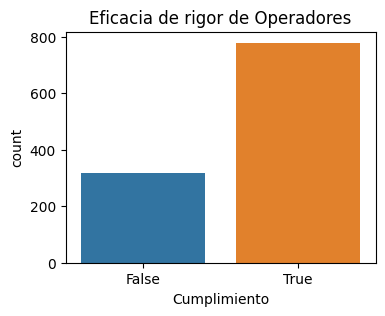

       count  proportion
True     779        0.71
False    316        0.29


In [42]:
# Crear columna effective para definir el cumplimiento de tareas del operador
# Aumentar el rigor de umbrales
report['rigor_effective'] = (
    (report['num_missed_calls_in'] <= med_a) |
    (report['avg_waiting_time_in'] <= med_b) |
    (report['num_calls_out'] >= avg_c)
)

# ajustar tamaño de figura
plt.figure(figsize=(4,3))
sns.countplot(data=report, x='rigor_effective')
plt.title('Eficacia de rigor de Operadores')
plt.xlabel('Cumplimiento')
plt.show() # mostrar plot

# cuantificar operadores
data = report['rigor_effective']
rigor_effective = pd.concat([data.value_counts(), data.value_counts(normalize=True)], axis=1).round(2)
# cambiar el nombre de las columnas 'count' y 'proportion' de rigor_effective
rigor_effective.columns = ['count', 'proportion']
print(rigor_effective)

In [43]:
# Calcular el número de operadores ineficaces que si recibieron llamadas
report[
    (data==False) & ~(
        (report['num_missed_calls_in'].isna()) |
        (report['avg_waiting_time_in'].isna())
        )
]['operator_id'].count()

87

Con mayor rigor se pasa de 3 a 87 operadores ineficaces verdaderos. Por diferencia de proporcion respecto al caso anterior, representan un 7% de ineficaces verdaderos, frente a un 71% de eficaces, de tal manera que sin considerar los dudosos se podría generalizar que 1 de cada 10 operadores es ineficaz. 87/(87+779)

Ahora se procede a observar el rendimiento de los operadores.

In [44]:
# Función para obtener tabla de frecuencia de historgramas
def freq_table(data, bins):
    """
    Crea una tabla con los rangos de los bins y sus frecuencias.

    Parameters:
    data (array-like): Los datos para calcular el histograma.
    bins (int): El número de bins para el histograma.

    Returns:
    pd.DataFrame: Un DataFrame con los rangos de los bins y sus frecuencias.
    """
    counts, bin_edges = np.histogram(data.dropna(), bins=bins)  # Calcula los histogramas con el número de bins especificado
    bin_ranges = [f'{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
    histogram_table = pd.DataFrame({'Bin Range': bin_ranges, 'Frequency': counts})

    # Filtra la tabla para mostrar solo las filas donde la frecuencia es mayor que cero
    filtered_table = histogram_table[histogram_table['Frequency'] > 0]

    return filtered_table

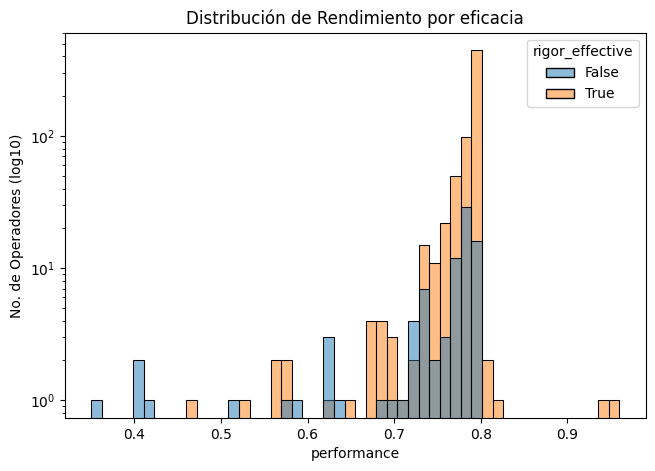

Operadores ineficaces



,Rendimiento,# Ineficaces
0,0.35 to 0.44,4
1,0.44 to 0.53,1
2,0.53 to 0.61,2
3,0.61 to 0.70,6
4,0.70 to 0.79,74


In [45]:
plt.figure(figsize=(7.5,5)) # tamaño de figura
sns.histplot(data=report, x='performance', hue='rigor_effective', bins=50) # trazar hist
#plt.yscale('log') # escala logarítmica en eje y para mostrar frecuencias mínimas
plt.title('Distribución de Rendimiento por eficacia')
plt.ylabel('No. de Operadores (log10)')
plt.yscale('log')
plt.show() # mostrar plot

mask = (report['rigor_effective']==False) # mascara booleana de ineficacia
hist_table = freq_table(data=report[mask]['performance'], bins=5)
hist_table.columns = ['Rendimiento', '# Ineficaces']
print('Operadores ineficaces\n')
display(hist_table) # mostrar tabla de freq

5 operadores tuvieron rendimientos ineficaces entre 35-53%, 8 tuvieron rendimientos entre 56-70% y otros 64 operadores tuvieron un buen rendimiento entre el 70-79%.

In [46]:
# Los 10 mejores operadores cumplen sus tareas y tienen un rendimiento de 80% en adelante

report[~mask].sort_values('performance', ascending=False).head(10)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,effective,performance,rigor_effective
24,885876,A,15.0,102.50,62491,True,0.96,True
25,885890,A,16.0,126.45,61310,True,0.94,True
401,925922,A,4.0,120.96,20367,True,0.82,True
8,880028,B,0.0,8.37,2614,True,0.81,True
4,879898,B,0.0,29.47,7443,True,0.81,True
546,939222,B,0.0,19.62,923,True,0.80,True
180,904016,C,2.0,35.62,4843,True,0.80,True
421,928886,C,0.0,18.25,731,True,0.80,True
419,928382,B,1.0,3.86,10,True,0.80,True
686,954616,B,0.0,7.67,0,True,0.80,True


In [47]:
# El rendimiento más bajo observado en operadores eficaces es del 46%. Tiene bastante margen de mejora al igual que sus próximos. Estos operadores son buenos trabajadores.

report[~mask].sort_values('performance', ascending=True)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,effective,performance,rigor_effective
338,919790,B,0.0,866.80,23,True,0.46,True
448,931458,C,9.0,694.82,2379,True,0.53,True
361,921318,C,6.0,616.89,2845,True,0.56,True
210,906076,C,0.0,611.50,1,True,0.56,True
336,919552,B,0.0,569.57,64,True,0.57,True
...,...,...,...,...,...,...,...,...
1040,952468,other,NaN,NaN,1140,True,NaN,True
1044,953462,other,NaN,NaN,733,True,NaN,True
1077,965540,other,NaN,NaN,823,True,NaN,True
1078,965542,other,NaN,NaN,681,True,NaN,True


In [48]:
# Los 10 operadores ineficaces con menor desempeño tienen un rendimiento de 35-63%. Incluso estos pueden mejorar.

report[mask].sort_values(['performance'], ascending=True).head(10)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,effective,performance,rigor_effective
2,0,C,3466.0,125.04,0,False,0.35,False
1,0,B,2867.0,163.65,0,False,0.40,False
340,919794,B,1.0,1007.38,21,True,0.40,False
209,906070,C,1.0,946.64,89,True,0.42,False
0,0,A,1203.0,364.86,0,False,0.52,False
331,919204,A,4.0,585.12,9,True,0.57,False
291,913938,B,13.0,526.94,411,False,0.59,False
329,919166,A,2.0,465.75,21,True,0.62,False
332,919206,A,5.0,430.29,1,True,0.63,False
292,913942,B,10.0,431.70,444,True,0.63,False



<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - ¡Buen trabajo estructurando el análisis de eficacia y rendimiento! Has aplicado criterios realistas, ponderaciones razonables y visualizaciones muy útiles para clasificar operadores. La lógica de clasificación progresiva con rigor también está muy bien pensada.

🎯 Sin embargo, hay algunos puntos que podrías mejorar para fortalecer aún más esta sección:

1. **Evitar agrupación masiva de `imports`:** Varios `import` están dispersos a lo largo del código. Es una buena práctica colocarlos todos al inicio del notebook para que sean fáciles de ubicar y mantener (por ejemplo, `import matplotlib.pyplot`, `seaborn`, `scipy.stats`, etc.).

2. **No se atiende el caso de duración cero:** No hay tratamiento específico para llamadas con `call_duration == 0`. Sería valioso incluir una validación o visualización de estas llamadas, ya que podrían afectar indicadores como el `avg_waiting_time_in` si están presentes en registros válidos. Incluso si ya se limpiaron antes, conviene verificar y documentar explícitamente su ausencia o impacto.

3. **Nombres de columnas poco claros temporalmente:** En la normalización para `performance`, el uso repetido de `scaler.fit_transform` directamente sobre cada columna puede generar resultados inconsistentes si se recalculan los valores por separado. Es recomendable escalar previamente todas las columnas juntas y luego combinar los resultados.



</div>



## Histogramas

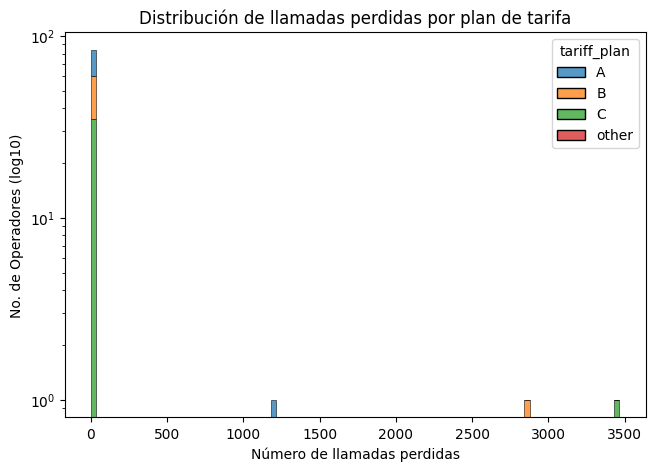

,Llamadas perdidas,# Ineficaces
0,1.00 to 18.32,84
69,1196.42 to 1213.75,1
165,2859.62 to 2876.95,1
199,3448.67 to 3466.00,1


In [49]:
# Trazar histograma de número de llamadas entrantes perdidas por operadores ineficaces
plt.figure(figsize=(7.5,5))
mask = report['rigor_effective'] == False
sns.histplot(
    data=report[mask],
    x='num_missed_calls_in',
    bins=100,
    hue='tariff_plan',
    multiple='stack')
plt.title('Distribución de llamadas perdidas por plan de tarifa')
plt.ylabel('No. de Operadores (log10)')
plt.xlabel('Número de llamadas perdidas')
plt.yscale('log')
plt.show()

hist_table = freq_table(data=report[mask]['num_missed_calls_in'], bins=200)
hist_table.columns = ['Llamadas perdidas', '# Ineficaces']
display(hist_table) # mostrar tabla de frecuencias

De los operadores ineficaces, existen 84 que han perdido menos de 19 llamadas de clientes de las tarifas A,B y C; 1 que perdió cerca de 1205 llamadas de clientes de la tariba A, otro operador perdió cerca de 2870 llamadas de la tarifa B y otro que no atendió 3460 llamadas de clientes de la tarifa C. Todos estos perdieron más de la media de 10.58 llamadas, el resto son operadores que no recibieron llamadas.

Convendría capacitar más a los operadores que atendieron a clientes de los planes A y C.

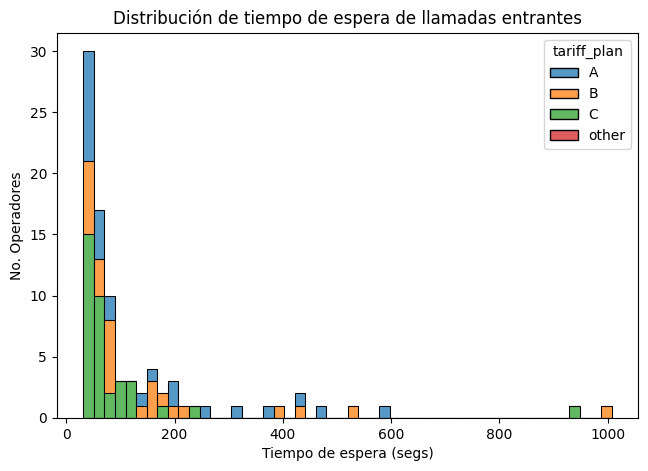

,Tiempo de espera (segs),# Ineficaces
0,31.49 to 129.08,63
1,129.08 to 226.67,12
2,226.67 to 324.26,3
3,324.26 to 421.85,2
4,421.85 to 519.43,3
5,519.43 to 617.02,2
9,909.79 to 1007.38,2


In [50]:
# Trazar histograma de tiempo de espera de llamadas entrantes por operadores ineficaces
plt.figure(figsize=(7.5,5))
sns.histplot(data=report[mask], x='avg_waiting_time_in', bins=50, hue='tariff_plan', multiple='stack')
plt.title('Distribución de tiempo de espera de llamadas entrantes')
plt.ylabel('No. Operadores')
plt.xlabel('Tiempo de espera (segs)')
plt.show()

hist_table = freq_table(data=report[mask]['avg_waiting_time_in'], bins=10)
hist_table.columns = ['Tiempo de espera (segs)', '# Ineficaces']
display(hist_table) # mostrar tabla de frecuencias

De la mayoría de operadores ineficaces 63 hicieron esperar hasta de 129 segundos a clientes de los planes A, B y C, de los mismos planes 12 operadores tardaron hasta 227 segundos en atender a clientes.

En general convendría capacitar más a los operadores de los 3 planes que sean más eficientes para atender rápidamente a los que están en cola de espera.

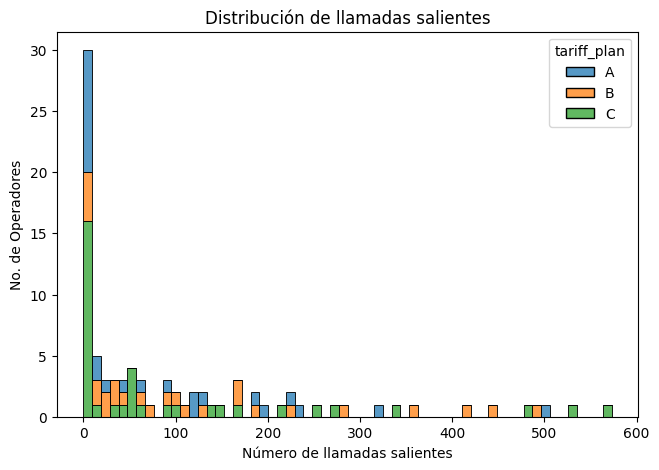

,Número de llamadas salientes,# Ineficaces
0,0.00 to 114.60,58
1,114.60 to 229.20,15
2,229.20 to 343.80,6
3,343.80 to 458.40,3
4,458.40 to 573.00,5


In [51]:
# Trazar histograma de llamadas salientes por operadores ineficaces parte 1
mask = (report['rigor_effective']==False) & (report['tariff_plan']!='other') # máscara booleana
plt.figure(figsize=(7.5,5))
sns.histplot(data=report[mask], x='num_calls_out', bins=60, hue='tariff_plan', multiple='stack')
plt.title('Distribución de llamadas salientes')
plt.ylabel('No. de Operadores')
plt.xlabel('Número de llamadas salientes')
plt.show()

hist_table = freq_table(data=report[mask]['num_calls_out'], bins=5)
hist_table.columns = ['Número de llamadas salientes', '# Ineficaces']
display(hist_table) # mostrar tabla de frecuencias

38 operadores ineficaces llamaron hasta 29 veces a clientes de los planes A, B, C respectivamente. 10 operadores llamaron a clientes de los 3 planes hasta una cantidad de 57 veces. Los que más llamaron no lograron superar el umbral de 580.

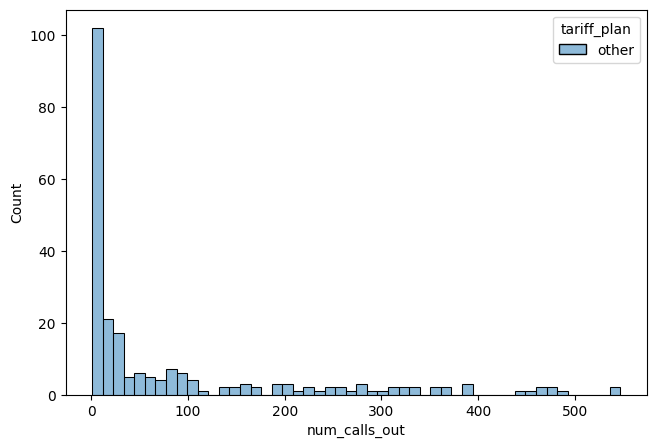

,Bin Range,Frequency
0,1.00 to 33.12,140
1,33.12 to 65.24,14
2,65.24 to 97.35,19
3,97.35 to 129.47,5
4,129.47 to 161.59,6


,Bin Range,Frequency
15,482.76 to 514.88,1
16,514.88 to 547.00,2


In [52]:
# Trazar histograma de llamadas salientes por operadores ineficaces parte 2
mask = (report['rigor_effective']==False) & (report['tariff_plan']=='other') # máscara booleana
plt.figure(figsize=(7.5,5))
sns.histplot(data=report[mask], x='num_calls_out', bins=50, hue='tariff_plan')

plt.show()

display(freq_table(data=report[mask]['num_calls_out'], bins=17).head(5)) # mostrar tabla de frecuencias
display(freq_table(data=report[mask]['num_calls_out'], bins=17).tail(2)) # mostrar tabla de frecuencias

In [53]:
report[mask]['num_calls_out'].count() # Contar operadores ineficaces con llamadas ajenas a los planes ABC

229

229 operadores ineficaces que realizaron llamadas ajenas a clientes de los planes A, B y C. Aproximadamente 140 operadores ineficaces realizaron hasta 33 llamadas y 33 operadores realizaron entre 33 y 97 llamadas. Solo 2 operadores llamaron hasta 547 veces, pero sigue debajo de la media de 580

##  Hipótesis.

* Hipótesis 1: Los operadores ineficaces pueden perder menos llamadas entrantes que el umbral establecido.
* Hipótesis 2: Los operadores ineficaces pueden demorarse atender llamadas entrantes menos que el umbral establecido.
* Hipótesis 3: Los operadores ineficaces pueden realizar más llamadas salientes que el mínimo establecido.

### Seleccionar Prueba estadística

Se elige una prueba t de studet en los 3 planteamientos para comparar la media de la muestra de estudio con la media general, previamente obtenida.

Para cumplir con las condiciones del Teorema Central del Límite se debe obtener una muestra de estudio que sea aleatoria de más de 30 observaciones sin superar al 10% del tamaño de la población.

In [54]:
mask = (report['rigor_effective'] == False) # máscara booleana de ineficacia

# Enlistar tareas de los operadores
tasks = ['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out']
tasks_threshold = [med_a, med_b, avg_c] # enlistar los umbrales de eficacia

# Determinar tamaños de las muestras aleatorias de cada tarea básica
samp_sizes = [int(report[task].count() * 0.1) for task in tasks]

# Muestrear las tareas de los operadores
samps = [report[mask][tasks[i]].dropna().sample(samp_sizes[i], random_state=0) for i in range(len(tasks))]

samp_sizes # mostrar tamaños de las muestras de estudio

[75, 75, 109]

Se utilizará muestras aleatorias de:

* 75 observaciones para el número de llamadas perdidas entrantes.
* 75 observaciones para la demora de contestar llamadas entrantes.
* 109 observaciones para el número de llamadas salientes.

Nivel de significancia

Se determina un α = 0.05 para priorizar la sensibilidad estadística en distinguir la ineficacia de los operadores en sus tareas básicas.

Definición de Agoritmo

En base a los parámetros de las muestras organizadas en listas, se define una función para la prueba estadística de t-student.

In [55]:
def custom_ttest(sample, popmean, h_alternative, s_index):
    """
    Realiza una prueba t de Student para una muestra específica.

    Parámetros:
    sample (list or array-like): Muestras para diferentes tareas.
    popmean (list or array-like): Medias poblacionales correspondientes.
    s_index (int): Índice de la tarea para la que se realiza la prueba.

    Retorno:
    None: Imprime el estadístico t y el valor p.
    """
    samp = sample[s_index]      # asignar muestra
    pop_mean = popmean[s_index] # asginar media poblacional

    # Realizar la prueba t de Student de una muestra
    t_statistic, p_value = stats.ttest_1samp(a=samp, popmean=pop_mean, alternative=h_alternative)

    print(f"Estadístico t: {t_statistic:.4f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Media muestral: {samp.mean():.2f}")
    print(f"Umbral referencia: {pop_mean:.2f}")

### Caso 1: Número de llamadas perdidas por operadores ineficaces

Formulación de hipótesis

* Hipótesis nula H_0: La media de llamadas perdidas por los operadores ineficaces es menor o igual al umbral de referencia.

* Hipótesis alternativa H_1: La media de llamadas perdidas por los operadores ineficaces es mayor que el umbral de referencia.

### Prueba de hipótesis

In [56]:
# Realizar prueba de hipótesis t-student
custom_ttest(samps, tasks_threshold, s_index=0, h_alternative='greater')

Estadístico t: 1.6831
Valor p: 0.0483
Media muestral: 103.24
Umbral referencia: 0.00


El valor P es ligeramente menor a 0.05, por lo que se puede rechazar la hipótesis nula ya que existe suficiente evidencia estadística para respaldar que los operadores ineficaces pierden en promedio más llamadas que el umbral establecido.

El estadístico t revela que en efecto hay una tendencia de los operadores ineficaces en sobrepasar el umbral.

### Caso 2: Demora de atención de operadores ineficaces

* Formulación de hipótesis
Hipótesis nula H_0: La demora promedio de los operadores ineficaces es menor o igual al umbral de referencia.

* Hipótesis alternativa H_1: La demora promedio de los operadores ineficaces es mayor que el umbral de referencia.

### Prueba de hipótesis

In [57]:
# Realizar prueba de hipótesis t-student
custom_ttest(samps, tasks_threshold, s_index=1, h_alternative='greater')

Estadístico t: 5.0258
Valor p: 0.0000
Media muestral: 137.67
Umbral referencia: 31.17


El valor P es extremadamente menor a 0.05, por lo que se rechaza la hipótesis nula ya que existe bastante evidencia estadística de que los operadores ineficaces se demoran más que el umbral establecido para atender llamadas entrantes.

El estadístico t revela que en efecto los operadores ineficaces suelen sobrepasar el umbral de 31.17 segundos.

### Caso 3: Número de llamadas salientes por operadores ineficaces

Formulación de hipótesis

* Hipótesis nula H_0: La cantidad media de llamadas salientes realizadas por los operadores ineficaces es mayor al umbral de referencia.

* Hipótesis alternativa H_1: La cantidad media de llamadas salientes realizadas por los operadores ineficaces es menor al umbral de referencia.

### Prueba de hipótesis

In [58]:
# Realizar prueba de hipótesis t-student
custom_ttest(samps, tasks_threshold, s_index=2, h_alternative='less')

Estadístico t: -33.6110
Valor p: 0.0000
Media muestral: 102.44
Umbral referencia: 580.35


El valor P es extremadamente menor a 0.05, por lo que se rechaza la hipótesis nula ya que existe bastante evidencia estadística de que los operadores llaman a clientes menos que el umbral establecido.

El estadístico t revela que en efecto los operadores ineficaces no alcanzan el umbral de 580 llamadas.

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente sección! El uso de histogramas desagregados por plan de tarifa aporta mucha claridad para analizar el comportamiento de los operadores ineficaces. Además, el uso de pruebas de hipótesis t-student está implementado de forma correcta, con justificaciones bien estructuradas y claridad en la interpretación de resultados.

👏 También es muy destacable la creación de una función personalizada (`custom_ttest`) para sistematizar las pruebas, lo que denota organización y pensamiento modular. Usar el Teorema Central del Límite para justificar el tamaño de muestra es otro gran acierto.

</div>

---

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Aunque el análisis es muy completo, hay algunas oportunidades para fortalecer aún más la calidad técnica:

1. **Separar claramente visualización de pruebas estadísticas:** Agrupar los histogramas con interpretaciones visuales y luego presentar las hipótesis como una sección aparte facilitaría la lectura y orden lógico del análisis.


¡Con pequeños ajustes en la estructura y revisando estos detalles, tu análisis quedará de diez! 📊📚

</div>


##  Conclusiones y Recomendaciones

### Resultados clave

* Los operadores solo son eficaces cuando cumplen a la vez las 3 tareas básicas de no perder llamadas, no demorarse más de 31.17 segundos en contestar llamadas entrantes y realizar al menos 581 llamadas a clientes.

* Existen 1095 operadores de los cuáles el 71% son eficaces y 29% ineficaces de los que 87 de ellos no pudieron recibir llamadas entrantes y en consecuencia no fueron capaces de perderlas.

* Aproximadamente 1 de cada 10 operadores es ineficaz.

* Un operador puede ser eficaz si aumenta su rendimiento general, sin embargo la clave está en no perder llamadas entrantes ni hacer esperar mucho a los clientes.

* Existe suficiente evidencia estadística de que los operadores ineficaces sobrepasan el umbral de llamadas perdidas, hacen esperar a los clientes más de 31 segundos para ser atendidos y no alcanzan la meta de 581 llamadas salientes.

* El rendimiento de los operadores se define por su carga de trabajo, por lo que existen aquellos con alto rendimiento aunque no cumplan todas las tareas.

* El alto rendimiento consiste en atender rápido a los clientes y en segundo lugar no perder llamadas.

* Los 10 operadores eficaces más destacados cumplen las 3 tareas y tienen un rendimiento de 80% hasta 96%.

* El rendimiento de los operadores eficaces comienza es de al menos 46%. Son buenos trabajadores con bastante margen de mejora.

* El rendimiento de los operadores ineficaces está entre 35-79%. Los de mayor rendimiento no son eficaces por el desbalance de tareas cumplidas.

### Rutas de mejora

* Realizar capacitaciones con los operadores para mejorar su rendimiento general y e indicar como metas generales los umbrales observados en este estudio que separan a los operadores eficaces de los ineficaces.

* Buscar hacer una distribución más pareja entre los operadores para de esta forma dar oportunidad a los que no la tuvieron por el bajo indice de recepción de llamadas para ser considerados eficaces y también para disminuir la carga de trabajo de los que están más saturados. Haciendo esto también podría ibservarse si existe un excendente de personal trabajando.

* Se podría tener un parametro de umbrales de eficacia menores mientras se va eficientando la operación y así ver la poaibilidad de irlos subiendo gradualmente otra vez para ir perfeccionando la operación.

* Hacer una revisión de los horarios y días con más operaciones para considerar también esto en la distribución entre los operadores para eficientar el trabajo.


# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has realizado un análisis profundo y muy bien fundamentado que abarca desde la limpieza de datos hasta un modelo robusto de evaluación de eficacia y rendimiento de operadores. Tus conclusiones están alineadas con los hallazgos y sustentadas por evidencia estadística sólida.

#### Puntos Positivos:

- **Procesamiento de datos:** Excelente trabajo manejando inconsistencias y duplicados con criterios de negocio realistas.
- **Evaluación de operadores:** Has definido métricas claras y combinado eficacia con rendimiento de manera lógica y accionable.
- **Visualización e interpretación:** Los histogramas están bien construidos y vinculados a los criterios definidos.
- **Pruebas de hipótesis:** Aplicadas de forma correcta y utilizadas para validar supuestos con evidencia empírica.
- **Conclusiones y recomendaciones:** Muy bien redactadas, con enfoque estratégico y propuestas claras de mejora operativa.

#### Áreas para Seguir Investigando:

- **Estandarización de importaciones y organización del notebook:** Alinear todos los `import` al inicio mejora la claridad estructural.
- **Documentación de llamadas con duración cero:** Aunque el preprocesamiento fue exhaustivo, incluir un análisis explícito de estos casos fortalecería aún más tu depuración.
- **Implementación de dashboards interactivos:** Con esta base analítica tan sólida, sería ideal visualizar estos indicadores en una herramienta como Tableau o Power BI.

¡Sigue así, estás haciendo un gran trabajo! Tu proyecto demuestra dominio técnico, comprensión del contexto de negocio y capacidad para comunicar hallazgos de manera efectiva. 💪🚀📈

</div>

##  Dashboard

### Dashboards

1. Sugerencia 1

    1. Traza un histograma para la duración de la llamada
    2. Traza un gráfico circular que muestre la participación de las llamadas internas y externas
    3. Agrega un filtro para la "dirección" de llamadas
    
    https://public.tableau.com/views/Sprint14CallmeMaybe/Dashboard1?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Fuentes

* Entender los MVNO: una guía sencilla para los operadores de redes virtuales móviles: https://wraycastle.com/es/blogs/knowledge-base/mvno#:~:text=Infraestructura%20y%20tecnolog%C3%ADa,y%20rentables%20para%20los%20consumidores.

* ¿Qué es y cómo funciona un MVNO? https://jscingenium.com/es/glosario/que-es-como-funciona-mvno/

* Sprint 3 Manipulación de datos (Data Wrangling). Proyecto de caítulo como base para el paso a paso de la revisión de los df.
https://tripleten.com/trainer/data-analyst/lesson/d7ea73a3-4e8c-461e-8c1c-52b223671cff/jupyter-homework/?theory_open=false

* Prueba de hipótesis. Sprint 5. Para realizar el planteamiento de la hipótesis así como sus comprobaciones
https://tripleten.com/trainer/data-analyst/lesson/798afc43-ed72-4e4c-9302-ecfbc0931c53/?from=program

* Como funciona percentile en numpy.
https://numpy.org/doc/2.1/reference/generated/numpy.percentile.html

* Documentación de uso de la biblioteca scipy para revisar la prueba t-student en las muestras experimentales de las tareas de los operadores. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

* Tutorial paso a paso sobre la implementación del preprocesamiento de datos utilizando Python, NumPy y Pandas. https://builtin.com/machine-learning/how-to-preprocess-data-python

